In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

### Data Collection

In [2]:
import requests

# URLs of the files
train_data_url = 'https://www.raphaelcousin.com/modules/module5/exercise/module5_exercise_train.csv'
test_data_url = 'https://www.raphaelcousin.com/modules/module5/exercise/module5_exercise_test.csv'

# Function to download a file
def download_file(url, file_name):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f'Downloaded {file_name} from {url}')

# Downloading the files
download_file(train_data_url, 'module5_exercise_train.csv')
download_file(test_data_url, 'module5_exercise_test.csv')

Downloaded module5_exercise_train.csv from https://www.raphaelcousin.com/modules/module5/exercise/module5_exercise_train.csv
Downloaded module5_exercise_test.csv from https://www.raphaelcousin.com/modules/module5/exercise/module5_exercise_test.csv


In [3]:
df_train =  pd.read_csv("module5_exercise_train.csv", sep=",")
df_test =  pd.read_csv("module5_exercise_test.csv", sep=",")

### Data analysis

In [4]:
#### Make a complete analysis on data preprocessing
# Inconsistencies
# Duplicates (data.duplicated().sum())
# Missing values (data.isnull().sum())
# Categorical
# Outliers
# Feature Engineering
# Feature Selection and/or Dimensionality Reduction

In [5]:
data = pd.concat([df_train, df_test], axis=0)

In [6]:
df_train.shape

(1909, 16)

In [7]:
df_test.shape

(365, 15)

In [8]:
def plot_feature_over_time(df, feature, date_id_start, date_id_end):
    df_filtered = df[(df['date'] >= date_id_start) & (df['date'] <= date_id_end)]

    if feature not in df_filtered.columns:
        print(f"Feature '{feature}' not found in the DataFrame.")
        return

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df_filtered['date'], df_filtered[feature], label=feature, linestyle='-')
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.title(f'{feature} from {date_id_start} to {date_id_end}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()



In [9]:
data['date'] = pd.to_datetime(data['date'])

In [10]:
data

,date,weather_condition,humidity,wind_speed,oil_brent_price_indicator,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10,electricity_demand
0,2015-01-08,Cloudy,69.304377,27.74 km/h,Moderate,0.369411,NaN,0.159977,0.118224,-0.444455,0.313675,0.106192,0.369430,1.279470,-0.384661,273.511353
1,2015-01-09,Sunny,55.955975,21.78 km/h,Moderate,2.009903,NaN,1.617242,NaN,2.160063,2.515627,1.867474,1.953165,1.878233,1.582365,258.827085
2,2015-01-10,Rainy,62.701614,6.83 m/s,Moderate,-2.603544,-2.422001,-3.685819,-2.392354,-1.936704,-2.950332,-3.074828,-2.698650,-2.354860,-2.770883,302.535033
3,2015-01-11,Snowy,60.375001,5.79 m/s,Moderate,-3.789836,-3.974054,-3.217545,-4.397143,-3.375188,-3.650454,-5.004991,-3.233724,-4.227899,NaN,296.270989
4,2015-01-12,Snowy,NaN,25.14 km/h,High,-2.405522,-2.161129,-2.880773,-2.587199,NaN,NaN,NaN,NaN,-2.790422,-2.033098,323.498090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,Snowy,71.521673,22.78 km/h,Moderate,-1.674798,-2.338987,-1.829170,-0.881428,-0.571347,-2.231680,-1.962735,-1.602805,-1.264779,-1.705180,NaN
361,2019-12-28,Sunny,67.220123,18.33 km/h,High,3.209205,2.508606,2.195577,NaN,NaN,3.236547,3.181473,3.094390,NaN,3.475638,NaN
362,2019-12-29,Rainy,68.085227,7.24 m/s,Moderate,3.688132,3.919479,NaN,4.071717,4.365347,3.580358,3.404292,4.173461,3.755625,4.070333,NaN
363,2019-12-30,Cloudy,65.877214,7.67 m/s,Moderate,NaN,0.700484,NaN,-0.407440,-0.580917,-0.444730,0.034229,0.021199,-0.864657,NaN,NaN


In [11]:
data['wind_speed']

,wind_speed
0,27.74 km/h
1,21.78 km/h
2,6.83 m/s
3,5.79 m/s
4,25.14 km/h
...,...
360,22.78 km/h
361,18.33 km/h
362,7.24 m/s
363,7.67 m/s


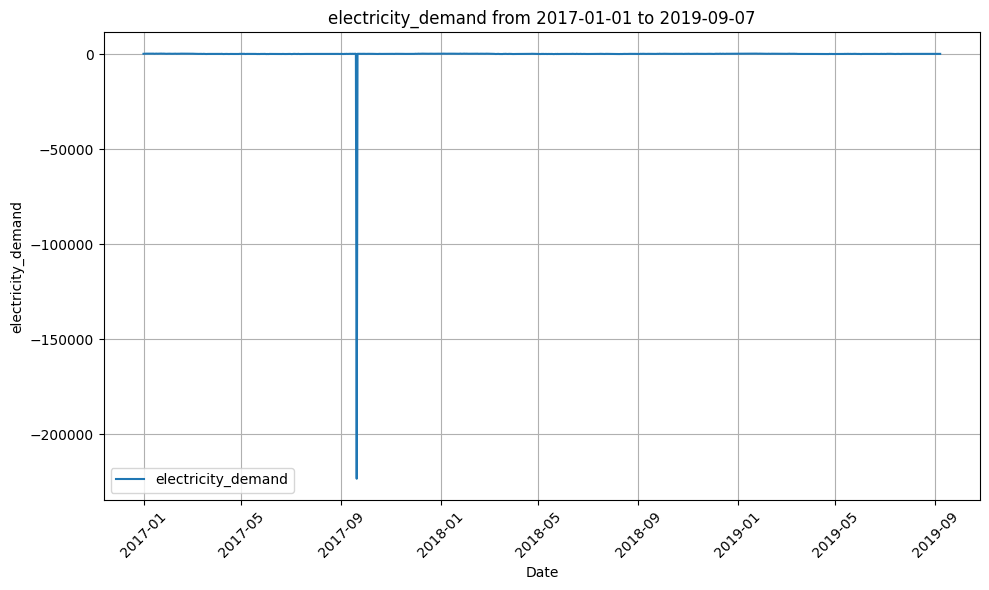

In [12]:
plot_feature_over_time(data, 'electricity_demand', '2017-01-01', '2019-09-07')

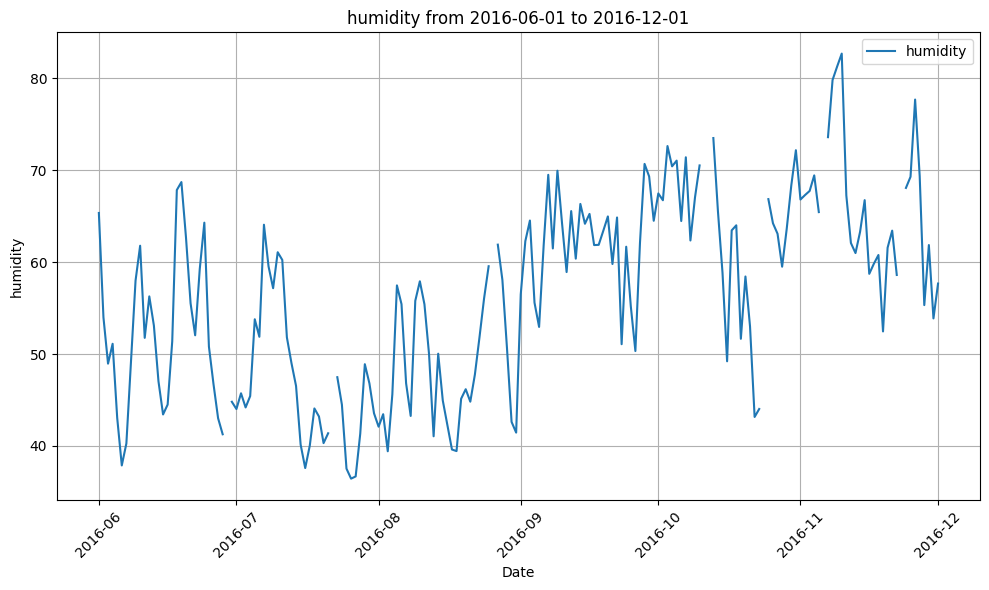

In [13]:
plot_feature_over_time(data, 'humidity', '2016-06-01', '2016-12-01')

In [14]:
#### Make a complete analysis on data preprocessing

In [15]:
train = df_train.copy().drop(columns=['date'], axis=1)

X_test =  df_test.copy().drop(columns=['date'], axis=1)

In [16]:
# Inconsistencies
data.shape

(2274, 16)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2274 entries, 0 to 364
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       2274 non-null   datetime64[ns]
 1   weather_condition          2246 non-null   object        
 2   humidity                   2165 non-null   float64       
 3   wind_speed                 2167 non-null   object        
 4   oil_brent_price_indicator  2274 non-null   object        
 5   temperature_station1       1930 non-null   float64       
 6   temperature_station2       1946 non-null   float64       
 7   temperature_station3       1934 non-null   float64       
 8   temperature_station4       1954 non-null   float64       
 9   temperature_station5       1937 non-null   float64       
 10  temperature_station6       1953 non-null   float64       
 11  temperature_station7       1913 non-null   float64       
 12  temperature_

In [18]:
# Duplicates
print(data.duplicated().sum())

90


In [19]:
# Categorical

categorical_columns = [col for col in data.columns if data[col].dtype == 'object' or data[col].nunique() < 11]
print("Categorical columns:", categorical_columns)

print(data[categorical_columns].apply(lambda x: x.unique()))

Categorical columns: ['weather_condition', 'wind_speed', 'oil_brent_price_indicator']
weather_condition                           [Cloudy, Sunny, Rainy, Snowy, nan]
wind_speed                   [27.74 km/h, 21.78 km/h, 6.83 m/s, 5.79 m/s, 2...
oil_brent_price_indicator           [Moderate, High, Low, Very Low, Very High]
dtype: object


In [20]:
# Missing values
data[data.isnull().any(axis=1)]
data.isnull().sum()

,0
date,0
weather_condition,28
humidity,109
wind_speed,107
oil_brent_price_indicator,0
temperature_station1,344
temperature_station2,328
temperature_station3,340
temperature_station4,320
temperature_station5,337


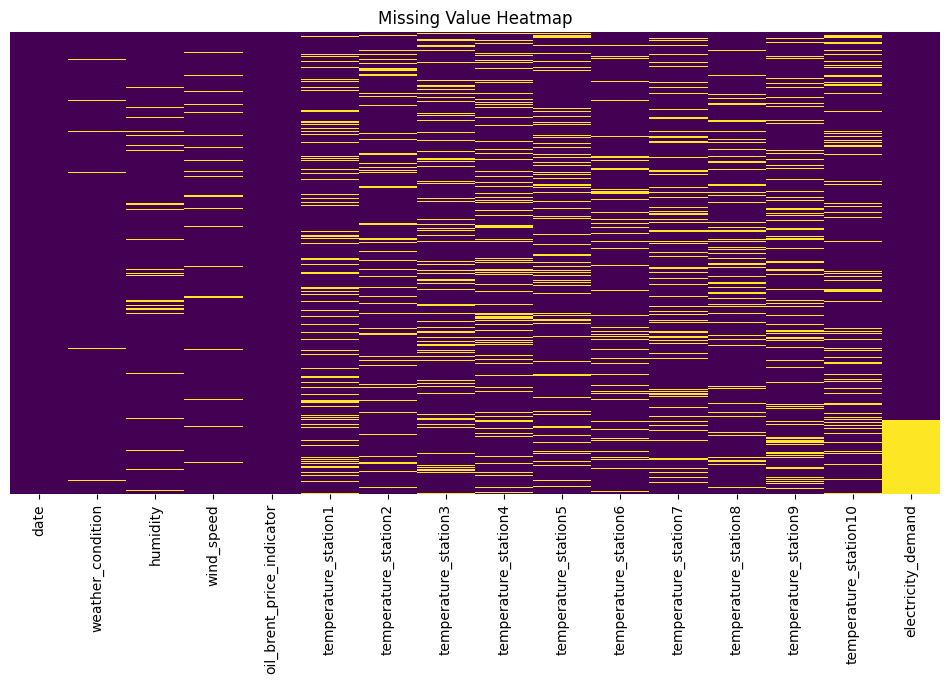

In [21]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Value Heatmap')
plt.show()

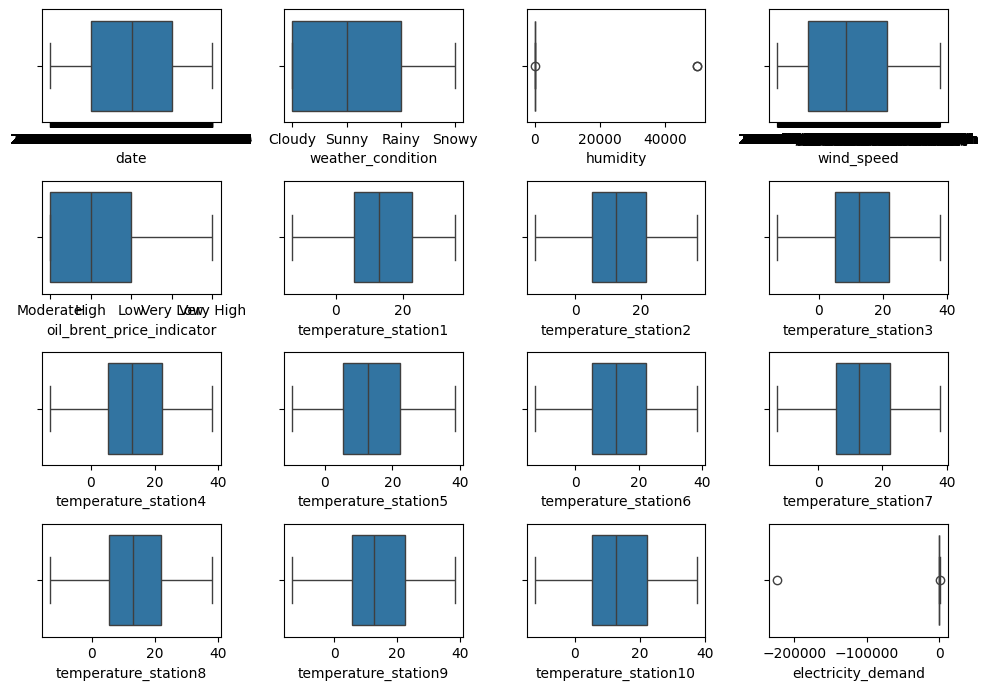

In [22]:
# Outliers
import seaborn as sns

plt.figure(figsize=(10, 10))

for i in range(df_train.shape[1]):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(x=df_train.iloc[:, i])
plt.tight_layout()
plt.show()

In [23]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

outliers = detect_outliers_iqr(df_train['humidity'])
print(outliers)
outliers = detect_outliers_iqr(df_train['electricity_demand'])
print("\n", outliers)

181        32.814149
1022    50000.000000
1509    50000.000000
Name: humidity, dtype: float64

 416        387.741952
1029   -223288.771683
Name: electricity_demand, dtype: float64


In [24]:
# Feature Engineering

#df_train['year'] = df_train['date'].dt.year
#df_train['month'] = df_train['date'].dt.month
#df_train['day'] = df_train['date'].dt.day
#df_train['dayofweek'] = df_train['date'].dt.dayofweek

#print(df_train)


Correlation matrix:


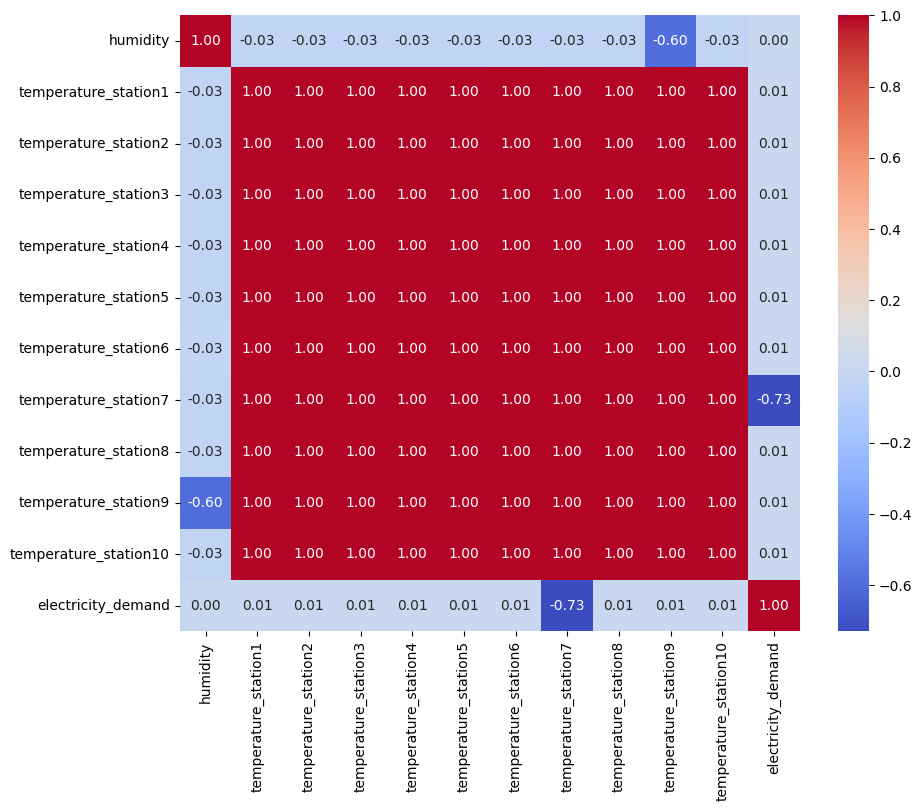

In [25]:
# Feature Selection and/or Dimensionality Reduction
# Correlation matrix
print("\nCorrelation matrix:")
corr_matrix = df_train.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

# WTF??

### Data Preprocessing Evaluation Strategy

In [26]:
# Provide a complete data preprocessing transformations

In [27]:
# 1. Handle Inconsistencies
def handle_inconsistencies(X_train, y_train, X_val=None):
    def handle_wind(x):
        wind = str(x).split(' ')
        if wind[-1] == "km/h":
            value = float(wind[0])
        elif wind[-1] == "m/s":
            value = float(wind[0]) *3.6
        else:
            value = float(wind[0])
        return value

    if X_val is not None:
        X_train['wind_speed'] = X_train['wind_speed'].apply(handle_wind)
        X_val['wind_speed'] = X_val['wind_speed'].apply(handle_wind)
        return X_train, y_train, X_val
    else:
        X_train['wind_speed'] = X_train['wind_speed'].apply(handle_wind)
        return X_train, y_train

# 2. Handling Duplicates
def handle_duplicates(X_train, y_train, X_val=None):
    if X_val is not None:
        return X_train.drop_duplicates(), y_train.drop_duplicates(), X_val.drop_duplicates()
    else:
        return X_train.drop_duplicates(), y_train.drop_duplicates()

# 3. Handling Missing Values
def handle_missing_values(X_train, y_train, X_val=None):
    if X_val is not None:
        X_train_imputed = X_train.ffill().bfill()
        X_val_imputed = X_val.ffill().bfill()
        return X_train_imputed, X_val_imputed
    else:
        X_train_imputed = X_train.ffill().bfill()
        return X_train_imputed

# 4. Handling Categorical Values
from sklearn.preprocessing import LabelEncoder
def handle_categorical(X_train, y_train, X_val=None):
    if X_val is not None:
        le = LabelEncoder()
        X_train_cat = pd.get_dummies(X_train, columns=['weather_condition'])
        X_train_cat['oil_brent_price_indicator'] = le.fit_transform(X_train_cat['oil_brent_price_indicator'])
        X_val_cat = pd.get_dummies(X_val, columns=['weather_condition'])
        X_val_cat['oil_brent_price_indicator'] = le.fit_transform(X_val_cat['oil_brent_price_indicator'])
        return X_train_cat, X_val_cat
    else:
        le = LabelEncoder()
        X_train_cat = pd.get_dummies(X_train, columns=['weather_condition'])
        X_train_cat['oil_brent_price_indicator'] = le.fit_transform(X_train_cat['oil_brent_price_indicator'])
        return X_train_cat

# 5. Handling Outliers
def handle_outliers(X_train, y_train, X_val=None):
    def impute_outliers(X):
        Q1 = X.quantile(0.25)
        Q3 = X.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        impute_value = X.mean()
        data_imputed = X.copy()
        data_imputed[(X < lower_bound) | (X > upper_bound)] = impute_value
        return data_imputed

    if X_val is not None:
        X_train['humidity'] = impute_outliers(X_train['humidity'])
        X_val['humidity'] = impute_outliers(X_val['humidity'])
        y_train = impute_outliers(y_train)
        return X_train, y_train, X_val
    else:
        X_train['humidity'] = impute_outliers(X_train['humidity'])
        y_train = impute_outliers(y_train)
        return X_train, y_train

# 6. Feature Engineering
def feature_engineering(X_train, y_train, X_val=None):
    if X_val is not None:
        X_train['date'] = pd.to_datetime(X_train['date'])
        X_train['year'] = X_train['date'].dt.year
        X_train['month'] = X_train['date'].dt.month
        X_train['day'] = X_train['date'].dt.day

        X_val['date'] = pd.to_datetime(X_val['date'])
        X_val['year'] = X_val['date'].dt.year
        X_val['month'] = X_val['date'].dt.month
        X_val['day'] = X_val['date'].dt.day
        return X_train, y_train, X_val
    else:
        X_train['date'] = pd.to_datetime(X_train['date'])
        X_train['year'] = X_train['date'].dt.year
        X_train['month'] = X_train['date'].dt.month
        X_train['day'] = X_train['date'].dt.day
        return X_train, y_train

# 7. Feature Selection and Dimensionality Reduction
def feature_selection(X_train, y_train, X_val=None):
    selected_columns = X_train.columns.drop(['date'])
    if X_val is not None:
        return X_train[selected_columns], X_val[selected_columns]
    else:
        return X_train[selected_columns]

In [28]:
def evaluate_pipeline(X, y, n_splits=5):

    ### call transformations here, if there is no learning and no need to be crossval
    X, y = handle_inconsistencies(X, y)
    X, y = handle_duplicates(X, y)
    X = handle_missing_values(X, y)
    X = handle_categorical(X, y)
    X, y = handle_outliers(X, y)
    X, y = feature_engineering(X, y)
    X = feature_selection(X, y)

    model = LinearRegression()

    tscv = TimeSeriesSplit(n_splits=n_splits)

    train_scores = []
    val_scores = []

    for fold, (train_index, val_index) in enumerate(tscv.split(X)):
        print(f"Processing fold {fold + 1}/{n_splits}...")

        # Split data into train and validation sets
        X_train, X_val = X.iloc[train_index].copy(), X.iloc[val_index].copy()
        y_train, y_val = y.iloc[train_index].copy(), y.iloc[val_index].copy()

        ### call transformations here, if there is learning
        #X_train, y_train, X_val = handle_inconsistencies(X_train, y_train, X_val)
        #X_train, y_train, X_val = handle_duplicates(X_train, y_train, X_val)
        #X_train, X_val = handle_missing_values(X_train, y_train, X_val)
        #X_train, X_val = handle_categorical(X_train, y_train, X_val)
        #X_train, y_train, X_val = handle_outliers(X_train, y_train, X_val)
        #X_train, y_train, X_val = feature_engineering(X_train, y_train, X_val)
        #X_train, X_val = feature_selection(X_train, y_train, X_val)

        # Train the model
        model.fit(X_train, y_train)

        # Predict on training set
        y_train_pred = model.predict(X_train)
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_scores.append(train_mse)

        # Predict on validation set
        y_val_pred = model.predict(X_val)
        val_mse = mean_squared_error(y_val, y_val_pred)
        val_scores.append(val_mse)

        print(f"Fold {fold + 1} Train MSE: {train_mse:.4f}, Validation MSE: {val_mse:.4f}")

    # Compute mean, max, and min values for train and validation MSE
    mean_train_mse = np.mean(train_scores)
    max_train_mse = np.max(train_scores)
    min_train_mse = np.min(train_scores)

    mean_val_mse = np.mean(val_scores)
    max_val_mse = np.max(val_scores)
    min_val_mse = np.min(val_scores)

    # Print results
    print("\nTrain MSE:")
    print(f"Mean: {mean_train_mse:.4f}, Max: {max_train_mse:.4f}, Min: {min_train_mse:.4f}")

    print("\nValidation MSE:")
    print(f"Mean: {mean_val_mse:.4f}, Max: {max_val_mse:.4f}, Min: {min_val_mse:.4f}")

    return mean_val_mse  # Return mean validation MSE as the overall score

In [29]:
# Prepare X and y
X = df_train.copy().drop(columns=['electricity_demand'], axis=1)
y = df_train.copy().pop('electricity_demand')

# Run the evaluation
evaluate_pipeline(X, y)

Processing fold 1/5...
Fold 1 Train MSE: 793.2834, Validation MSE: 1505.8162
Processing fold 2/5...
Fold 2 Train MSE: 1083.1345, Validation MSE: 1131.9271
Processing fold 3/5...
Fold 3 Train MSE: 1043.7956, Validation MSE: 1504.4900
Processing fold 4/5...
Fold 4 Train MSE: 1131.8035, Validation MSE: 1174.1647
Processing fold 5/5...
Fold 5 Train MSE: 1126.5190, Validation MSE: 1098.5643

Train MSE:
Mean: 1035.7072, Max: 1131.8035, Min: 793.2834

Validation MSE:
Mean: 1282.9924, Max: 1505.8162, Min: 1098.5643


1282.9924460743568

### Generating Submission File

In [30]:
# Train and submit your results

In [31]:
# Prepare X_train and y_train from your data
df_train =  pd.read_csv("module5_exercise_train.csv", sep=",")

X_train = df_train.drop(columns=['electricity_demand'], axis=1)
y_train = df_train['electricity_demand']

X_test =  pd.read_csv("module5_exercise_test.csv", sep=",")

In [32]:
def train_and_predict_to_submit(X_train, y_train, X_test):
    model = LinearRegression()

    X_train, y_train, X_test = handle_inconsistencies(X_train, y_train, X_test)
    X_train, y_train, X_test = handle_duplicates(X_train, y_train, X_test)
    X_train, X_test = handle_missing_values(X_train, y_train, X_test)
    X_train, X_test = handle_categorical(X_train, y_train, X_test)
    X_train, y_train, X_test = handle_outliers(X_train, y_train, X_test)
    X_train, y_train, X_test = feature_engineering(X_train, y_train, X_test)
    X_train, X_test = feature_selection(X_train, y_train, X_test)

    # Train the model on the entire training set
    print(f"Training model on entire dataset of shape: {X_train.shape}")
    model.fit(X_train, y_train)

    # Predict on the test set
    print(f"Predicting on test dataset of shape: {X_test.shape}")
    y_test_pred = model.predict(X_test)

    return y_test_pred

In [33]:
# Call serve_model to train and predict
y_test_pred = train_and_predict_to_submit(X_train, y_train, X_test)

Training model on entire dataset of shape: (1819, 20)
Predicting on test dataset of shape: (365, 20)


In [34]:
# Generating Submission File
submission = pd.DataFrame({
    'date': X_test['date'],
    'electricity_demand': y_test_pred
})

# Save the submission file
submission.to_csv('submission.csv', index=False, sep=',')
print("Submission file saved as 'submission.csv'.")

Submission file saved as 'submission.csv'.
